In [64]:
import pandas as pd
import numpy as np

In [65]:
data = pd.read_excel('water_quality_dataset.xlsx', sheet_name='RapidMiner Data', usecols="C:Q", nrows=88)

In [66]:
data.head()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,water Quality(A/B/C/D/E)
0,267.95,7.28,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.64,10.94,-8.45,E
1,94.85,7.18,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.34,1.58,-2.10,A
2,226.14,7.48,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,0.99,4.17,-10.60,E
3,211.55,7.34,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.65,7.17,-6.50,E
4,238.30,7.22,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.21,2.05,-12.00,E


In [67]:
target_column = 'water Quality(A/B/C/D/E)'

In [68]:
data['RSC(Residual Sodium Carbonate'] = data['RSC(Residual Sodium Carbonate'] - pd.DataFrame.min(data['RSC(Residual Sodium Carbonate'])


In [69]:
data['water Quality(A/B/C/D/E)'] = data['water Quality(A/B/C/D/E)'].apply(lambda x: ord(x) - ord('A'))
data.head()

,Mg,PH,K(Potassium),NITRATE,SULPHATE,EC(Electrical Conductivity),Ca(Calcium),Na(Sodium),CARBONATE,BICARBONATE,CHLORIDE,FLUORIDE,SAR(Sodium Absorption Ratio),RSC(Residual Sodium Carbonate,water Quality(A/B/C/D/E)
0,267.95,7.28,10.0,276.0,304.0,5730,16.0,850,0,878.0,1304.0,1.64,10.94,26.66,4
1,94.85,7.18,3.0,2.0,12.0,1069,24.0,77,0,421.0,163.0,1.34,1.58,33.01,0
2,226.14,7.48,0.0,16.0,150.0,2830,20.0,300,0,549.0,631.0,0.99,4.17,24.51,4
3,211.55,7.34,5.0,140.0,264.0,3600,20.0,500,0,726.0,680.0,1.65,7.17,28.61,4
4,238.30,7.22,2.0,174.0,240.0,2300,24.0,152,0,537.0,305.0,1.21,2.05,23.11,4


In [70]:
X = data.iloc[:,:-1]  # independent columns
Y = data.iloc[:,-1]   # target column

## Univariate Selection

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [72]:
def print_k_best(dfcolumns, dfscores):
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Attribute','Score']  #naming the dataframe columns
    print(featureScores.nlargest(14,'Score'))  #print 10 best features

In [73]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

                        Attribute         Score
5     EC(Electrical Conductivity)  74115.240056
10                       CHLORIDE  26284.765414
7                      Na(Sodium)   8609.395626
0                              Mg   3620.603267
9                     BICARBONATE   3053.287567
3                         NITRATE   2305.087709
4                        SULPHATE   1781.590522
6                     Ca(Calcium)   1141.541445
2                    K(Potassium)    720.653858
8                       CARBONATE    421.435887
13  RSC(Residual Sodium Carbonate     74.896724
12   SAR(Sodium Absorption Ratio)     56.114479
11                       FLUORIDE      3.257266
1                              PH      0.326835


In [74]:
bestfeatures = SelectKBest(score_func=f_classif, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

                        Attribute      Score
0                              Mg  41.102340
5     EC(Electrical Conductivity)  40.990369
10                       CHLORIDE  27.688830
13  RSC(Residual Sodium Carbonate  16.669395
9                     BICARBONATE  15.958355
7                      Na(Sodium)  15.238371
12   SAR(Sodium Absorption Ratio)   7.396511
3                         NITRATE   5.861451
4                        SULPHATE   4.666620
6                     Ca(Calcium)   4.653511
11                       FLUORIDE   4.149878
1                              PH   3.730908
8                       CARBONATE   2.380568
2                    K(Potassium)   2.137290


In [75]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=14)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
print_k_best(dfcolumns, dfscores)

                        Attribute     Score
5     EC(Electrical Conductivity)  0.597414
10                       CHLORIDE  0.478400
7                      Na(Sodium)  0.470400
0                              Mg  0.459574
13  RSC(Residual Sodium Carbonate  0.389811
1                              PH  0.279084
9                     BICARBONATE  0.269873
4                        SULPHATE  0.244749
12   SAR(Sodium Absorption Ratio)  0.224383
6                     Ca(Calcium)  0.198210
11                       FLUORIDE  0.130527
3                         NITRATE  0.130204
2                    K(Potassium)  0.088189
8                       CARBONATE  0.079411


## Feature Importance

In [76]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [77]:
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [78]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.09184859 0.05902018 0.04596453 0.04160693 0.04306631 0.18411461
 0.05741197 0.07761113 0.03442612 0.07837768 0.11806953 0.04458682
 0.04738347 0.07651212]


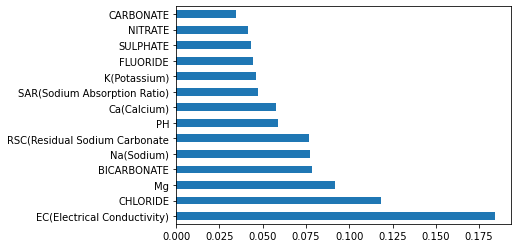

In [79]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.show()

## Correlation co-efficient

In [80]:
import seaborn as sns
import matplotlib.pyplot as pl

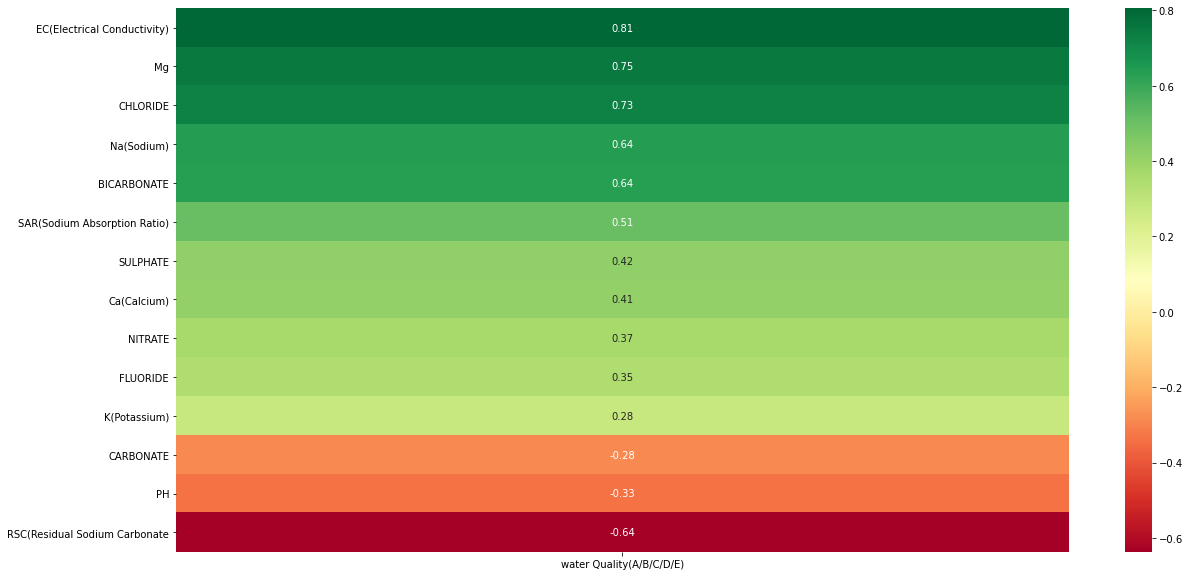

In [81]:
pl.figure(figsize=(20,10))
#plot heat map
g=sns.heatmap(data.corr()[[target_column]].sort_values(by=[target_column], ascending=False)[1:],annot=True,cmap="RdYlGn")